In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
train.shape

(550068, 12)

In [6]:
test.shape

(233599, 11)

In [7]:
train.isnull().sum()/train.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [8]:
train.corr()['Purchase']

User_ID               0.004716
Occupation            0.020833
Marital_Status       -0.000463
Product_Category_1   -0.343703
Product_Category_2   -0.209918
Product_Category_3   -0.022006
Purchase              1.000000
Name: Purchase, dtype: float64

In [9]:
train["Product_Category_2"].fillna(0, inplace = True)
train["Product_Category_3"].fillna(0, inplace = True)
test["Product_Category_2"].fillna(0, inplace = True)
test["Product_Category_3"].fillna(0, inplace = True)

In [10]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [11]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [12]:
train.corr()['Purchase']

User_ID               0.004716
Occupation            0.020833
Marital_Status       -0.000463
Product_Category_1   -0.343703
Product_Category_2    0.052288
Product_Category_3    0.288501
Purchase              1.000000
Name: Purchase, dtype: float64

In [13]:
cat_var = train.select_dtypes(include='O').keys().to_list()
cat_var

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [14]:
for i in cat_var:
    u = train[i].value_counts()
    print(u)

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00068342       1
P00012342       1
P00312542       1
P00066342       1
P00315242       1
Name: Product_ID, Length: 3631, dtype: int64
M    414259
F    135809
Name: Gender, dtype: int64
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


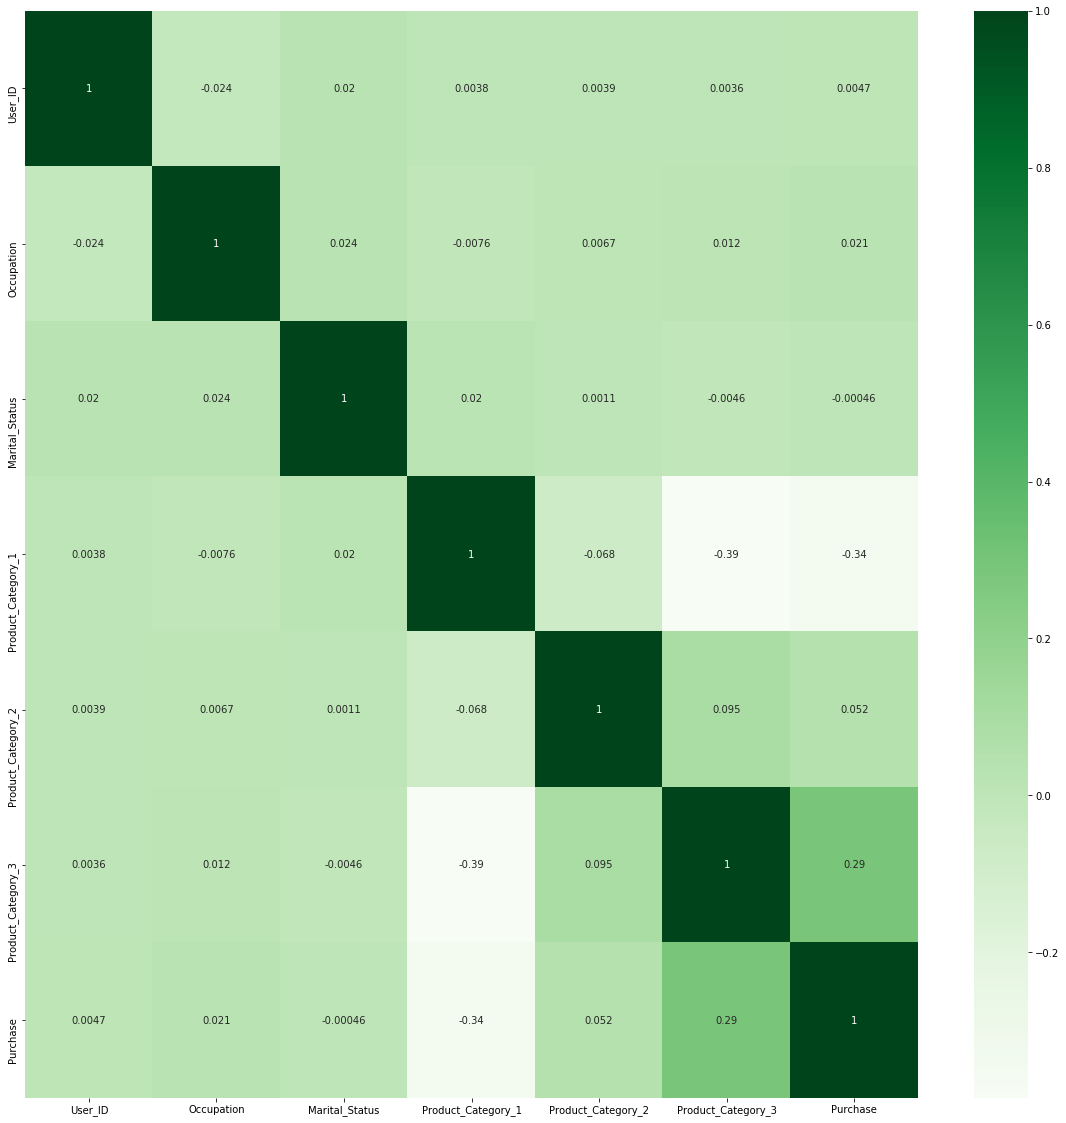

In [15]:
plt.figure(figsize = (20,20))
sns.heatmap(train.corr(),annot = True,cmap="Greens")

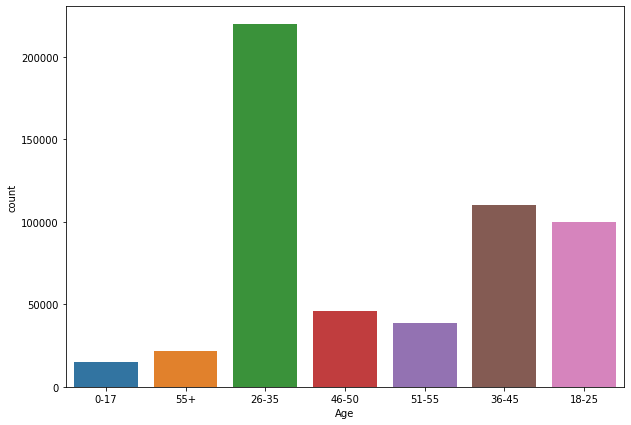

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(train['Age'])
plt.show()


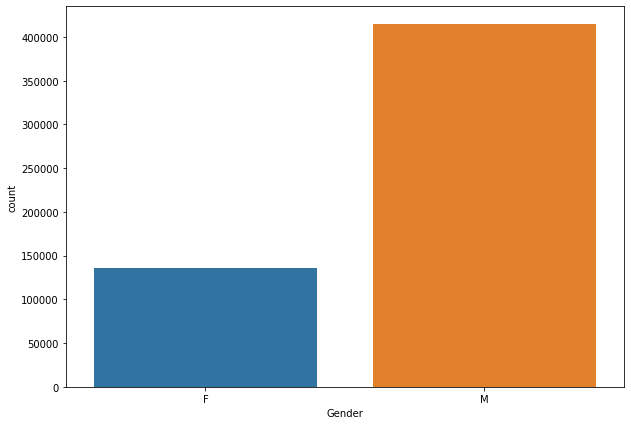

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(train['Gender'])
plt.show()


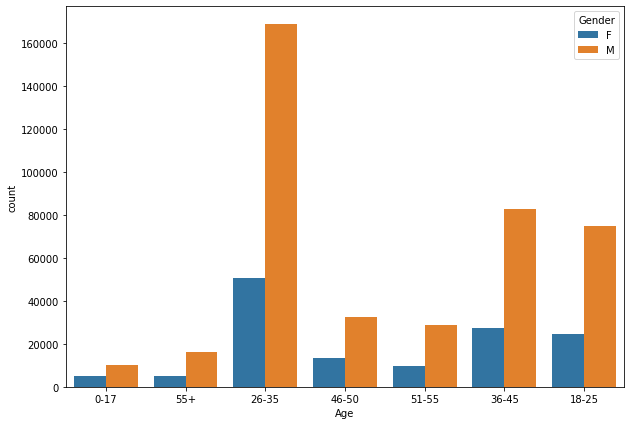

In [18]:
plt.figure(figsize = (10,7))
sns.countplot(train['Age'],hue = train['Gender'])
plt.show()


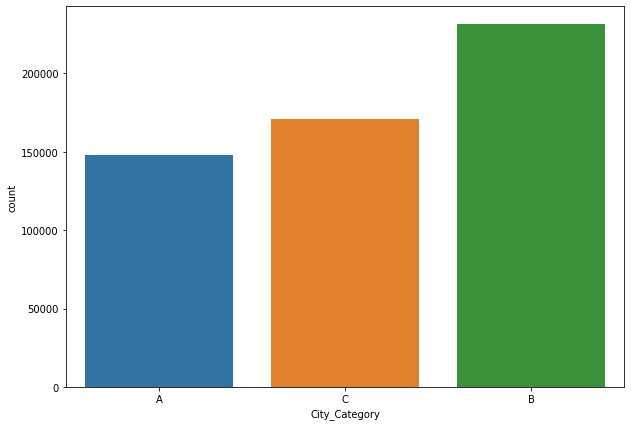

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(train['City_Category'])
plt.show()

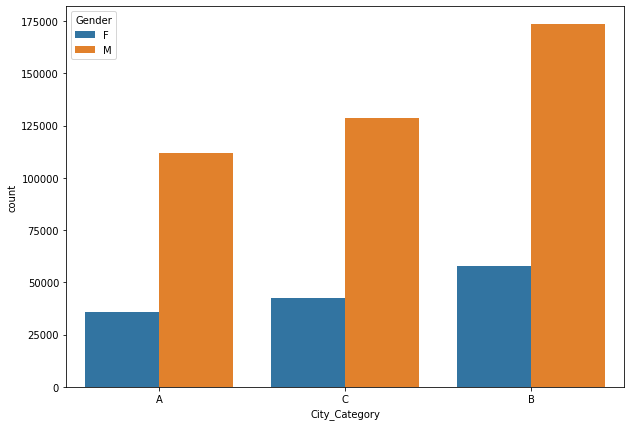

In [20]:
plt.figure(figsize=(10,7))
sns.countplot(train['City_Category'],hue = train['Gender'])
plt.show()


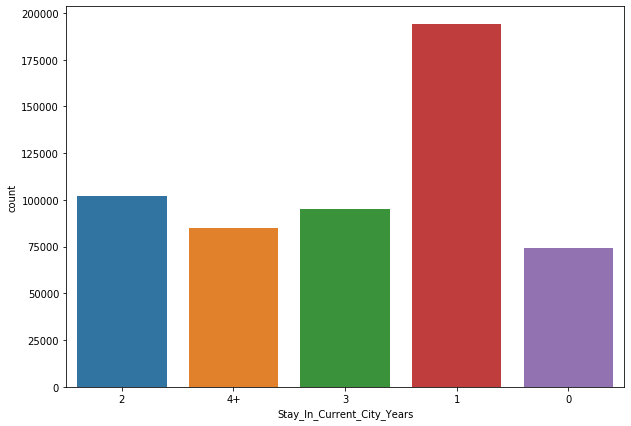

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(train['Stay_In_Current_City_Years'])
plt.show()


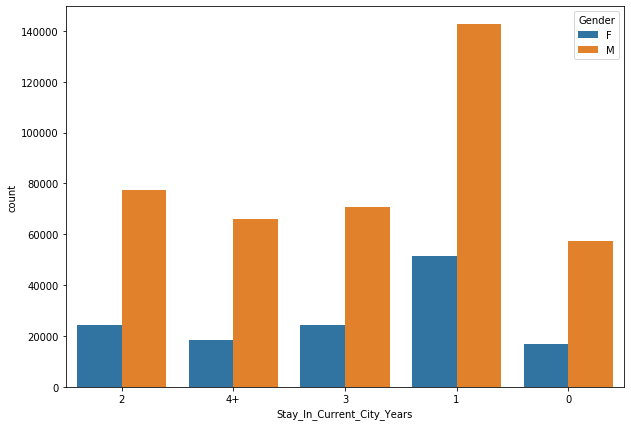

In [22]:
plt.figure(figsize=(10,7))
sns.countplot(train['Stay_In_Current_City_Years'],hue = train['Gender'])
plt.show()

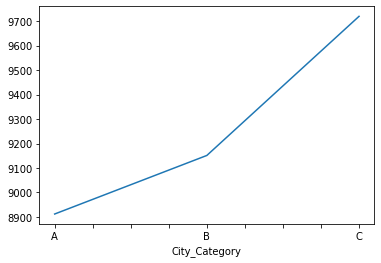

In [23]:
train.groupby('City_Category')['Purchase'].mean().plot()

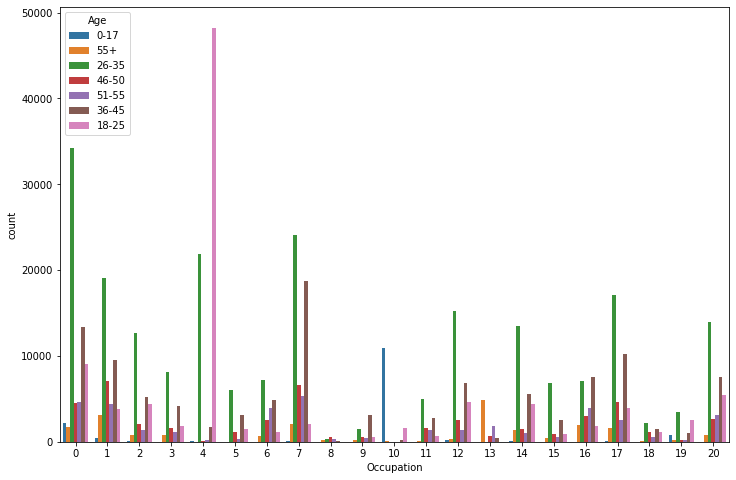

In [24]:
plt.figure(figsize=[12,8])
sns.countplot(train['Occupation'],hue=train["Age"])

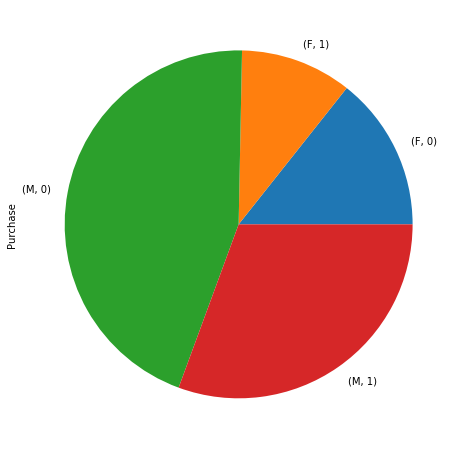

In [25]:
train.groupby(['Gender','Marital_Status'])['Purchase'].count().plot(kind='pie',figsize=(8,8))

In [26]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [27]:
train['Gender'].replace({'M':0,'F':1},inplace = True)
test['Gender'].replace({'M':0,'F':1},inplace = True)


In [28]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,1,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,1,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,0,55+,16,C,4+,0,8,0.0,0.0,7969


In [29]:
train['City_Category'].replace({'A':2,'B':1,'C':3},inplace = True)
test['City_Category'].replace({'A':2,'B':1,'C':3},inplace = True)

In [30]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,0-17,10,2,2,0,3,0.0,0.0,8370
1,1000001,P00248942,1,0-17,10,2,2,0,1,6.0,14.0,15200
2,1000001,P00087842,1,0-17,10,2,2,0,12,0.0,0.0,1422
3,1000001,P00085442,1,0-17,10,2,2,0,12,14.0,0.0,1057
4,1000002,P00285442,0,55+,16,3,4+,0,8,0.0,0.0,7969


In [31]:
train['Stay_In_Current_City_Years'].replace({'4+':4},inplace=True)
test['Stay_In_Current_City_Years'].replace({'4+':4},inplace=True)

In [32]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,0-17,10,2,2,0,3,0.0,0.0,8370
1,1000001,P00248942,1,0-17,10,2,2,0,1,6.0,14.0,15200
2,1000001,P00087842,1,0-17,10,2,2,0,12,0.0,0.0,1422
3,1000001,P00085442,1,0-17,10,2,2,0,12,14.0,0.0,1057
4,1000002,P00285442,0,55+,16,3,4,0,8,0.0,0.0,7969


In [33]:
train['Stay_In_Current_City_Years']= train['Stay_In_Current_City_Years'].astype(int)
test['Stay_In_Current_City_Years']= test['Stay_In_Current_City_Years'].astype(int)

In [34]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age ==  '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
    

In [35]:
train['Age']=train['Age'].apply(map_age)
test['Age']=test['Age'].apply(map_age)

In [36]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,0,10,2,2,0,3,0.0,0.0,8370
1,1000001,P00248942,1,0,10,2,2,0,1,6.0,14.0,15200
2,1000001,P00087842,1,0,10,2,2,0,12,0.0,0.0,1422
3,1000001,P00085442,1,0,10,2,2,0,12,14.0,0.0,1057
4,1000002,P00285442,0,6,16,3,4,0,8,0.0,0.0,7969


In [37]:
cat_var = train.select_dtypes(include='O').keys().to_list()
cat_var

['Product_ID']

In [38]:
for i in cat_var:
    u = train[i].value_counts()
    print(u)

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00068342       1
P00012342       1
P00312542       1
P00066342       1
P00315242       1
Name: Product_ID, Length: 3631, dtype: int64


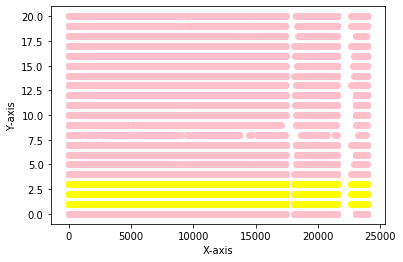

In [39]:
plt.scatter('Purchase','Occupation' ,data = train, c ="pink") 
  
plt.scatter('Purchase','City_Category' , data = train,c ="yellow") 
  
plt.xlabel("X-axis") 
plt.ylabel("Y-axis") 
plt.show()

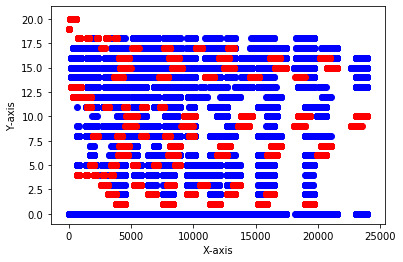

In [40]:
plt.scatter('Purchase','Product_Category_2' ,data = train, c ="blue",  
            ) 
  
plt.scatter('Purchase','Product_Category_1' , data = train,c ="red") 
  
plt.xlabel("X-axis") 
plt.ylabel("Y-axis") 
plt.show()

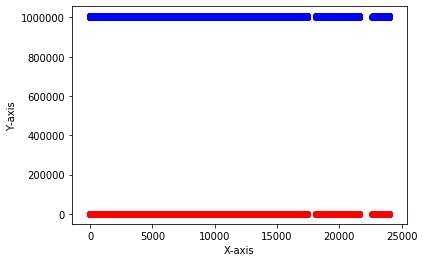

In [41]:
plt.scatter('Purchase','User_ID' ,data = train, c ="blue",  
            ) 
  
plt.scatter('Purchase','Occupation' , data = train,c ="red") 
  
plt.xlabel("X-axis") 
plt.ylabel("Y-axis") 
plt.show()

In [42]:
train.drop('Product_ID',axis = 1 ,inplace = True)
test.drop('Product_ID',axis = 1 ,inplace = True)

In [43]:
from sklearn.model_selection import train_test_split
X = train.drop('Purchase',axis = 1)
y = train['Purchase']
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [44]:

from sklearn.tree import DecisionTreeRegressor

In [45]:
dt = DecisionTreeRegressor()

In [46]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [47]:
dt.score(X_test,y_test)

0.5179517993264321

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [49]:
RF  = RandomForestRegressor()

In [50]:
RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
RF.score(X_test,y_test)

0.6461379790119872

In [52]:
y_pred  = RF.predict(X_test)

In [55]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
rmse

2980.9633128059536